### Store Sales Prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Data Cleaning and Feature Engineering

In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
# Dividing the data set to numerical data and categorical data
categorical_list = df.select_dtypes(include=['object']).columns.to_list()
numerical_list = df.select_dtypes(exclude=['object']).columns.to_list()

print("Categorical Features:",categorical_list)
print("Numerical Features:",numerical_list)

Categorical Features: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numerical Features: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


#### Fill Missing values

In [7]:
# finding mean of Item_weight
df['Item_Weight'].mean()

12.857645184135976

We found many NA values in 'Item_Weight' column, in order to not changing mean, we replace na values with 
mean value. 

In [8]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

There were many missing values in 'Outlet_Size' column, since it consists of categorical values, we replace the NA values with **mode**

In [9]:
# We have found mode wrt to Outlet_type
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x:x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [10]:
missing_values = df.Outlet_Size.isnull()
df.loc[missing_values,'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [11]:
# Checking for any na values
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Data Ananlysis

In [12]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Analysis of Numerical Features

In [13]:
numerical_list

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

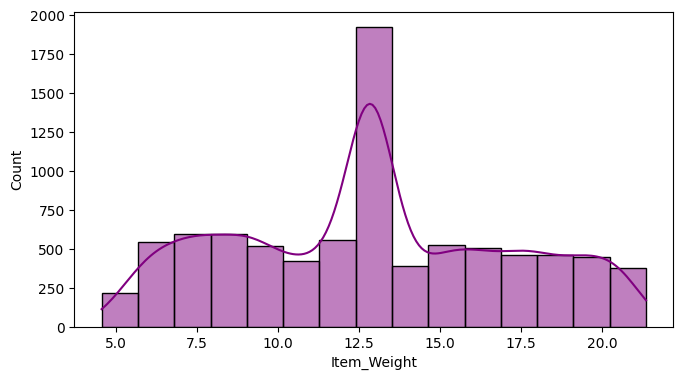

In [14]:
# Analysis of Item_Weight
plt.figure(figsize = (17,9))
plt.subplot(2,2,1)
sns.histplot(df.Item_Weight, color='purple', bins=15, kde={'alpha':0.5})
plt.show()

Average around 13

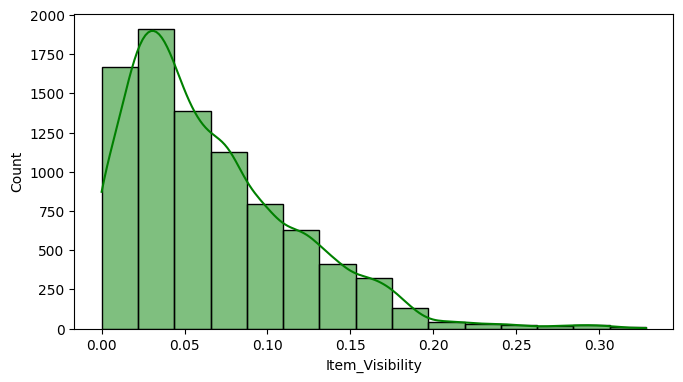

In [15]:
# Analysis of Item_Visibility
plt.figure(figsize = (17,9))
plt.subplot(2,2,1)
sns.histplot(df.Item_Visibility, color='green', bins=15, kde={'alpha':0.5})
plt.show()

Average around 0.06

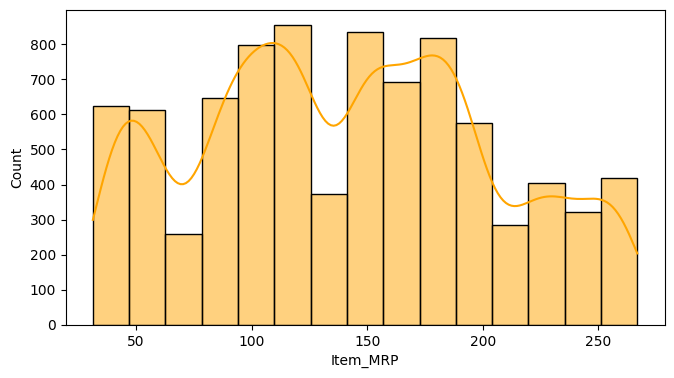

In [16]:
# Analysis of Item_MRP
plt.figure(figsize = (17,9))
plt.subplot(2,2,1)
sns.histplot(df.Item_MRP, color='orange', bins=15, kde={'alpha':0.5})
plt.show()

Average = 140

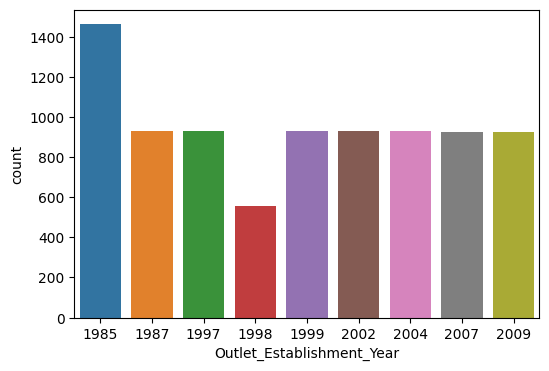

In [17]:
# Outlet_Establishment_Year
plt.figure(figsize=(6,4))
sns.countplot(x=df.Outlet_Establishment_Year)
plt.show()

Maximum outlet in 1985

Minimum outlet in 1998

Others are almost same

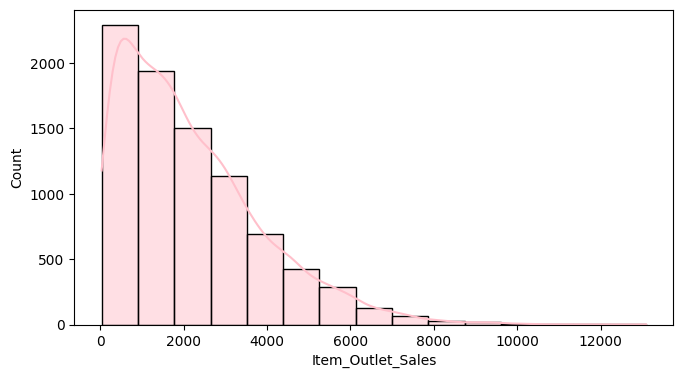

In [18]:
# Analysis of Item_Outlet_Sales
plt.figure(figsize = (17,9))
plt.subplot(2,2,1)
sns.histplot(df.Item_Outlet_Sales, color='pink', bins=15, kde={'alpha':0.5})
plt.show()

Average outlet sales arounf 2000

##### Analysis of Categorical data

In [19]:
categorical_list

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

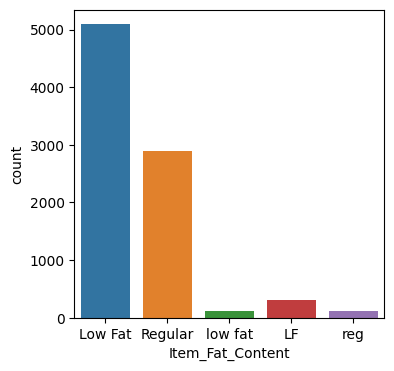

In [20]:
# Item_Fat_Content 
plt.figure(figsize=(4,4))
sns.countplot(x = df.Item_Fat_Content)
plt.show()

Looks like there are 3 low fat columns. 
Hence We perform data cleansing to make it into a single column

In [21]:
df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [22]:
df.Item_Fat_Content = df.Item_Fat_Content.replace(
    {
        'low fat' : 'Low Fat',
        'LF' : 'Low Fat',
        'reg' : 'Regular'    
    }
)
# df.Item_Fat_Content.value_counts()

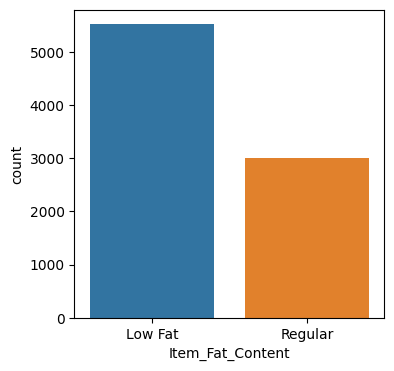

In [23]:
# Item_Fat_Content 
plt.figure(figsize=(4,4))
sns.countplot(x = df.Item_Fat_Content)
plt.show()

Text(0.5, 1.0, 'Count of Items by Type (Descending Order)')

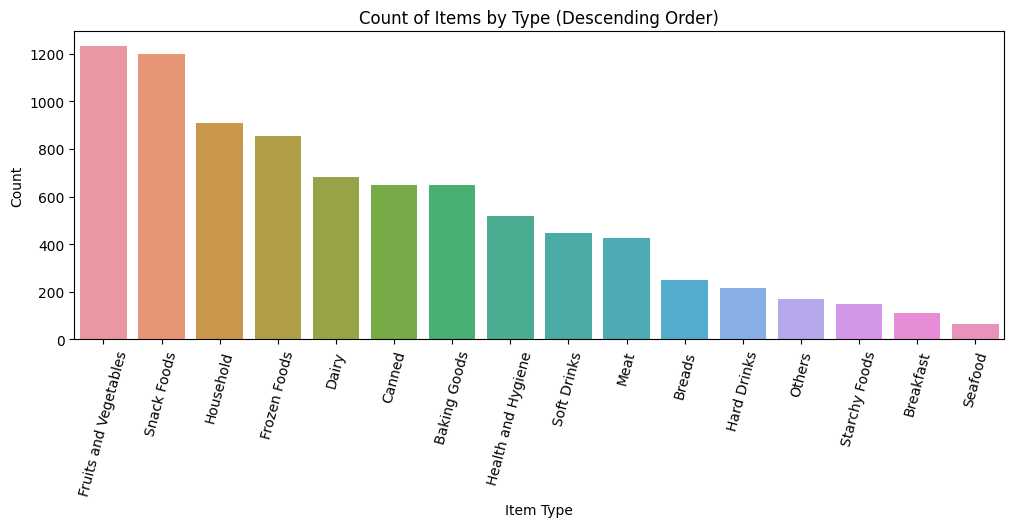

In [24]:
# Item_Type
# Calculate the count of each item type and sort in descending order
item_type_counts = df.Item_Type.value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,4))
ax = sns.countplot(data=df, x='Item_Type', order=item_type_counts.index)
plt.xticks(rotation=75)
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.title('Count of Items by Type (Descending Order)')


Text(0.5, 1.0, 'Count of Outlet by size (Descending Order)')

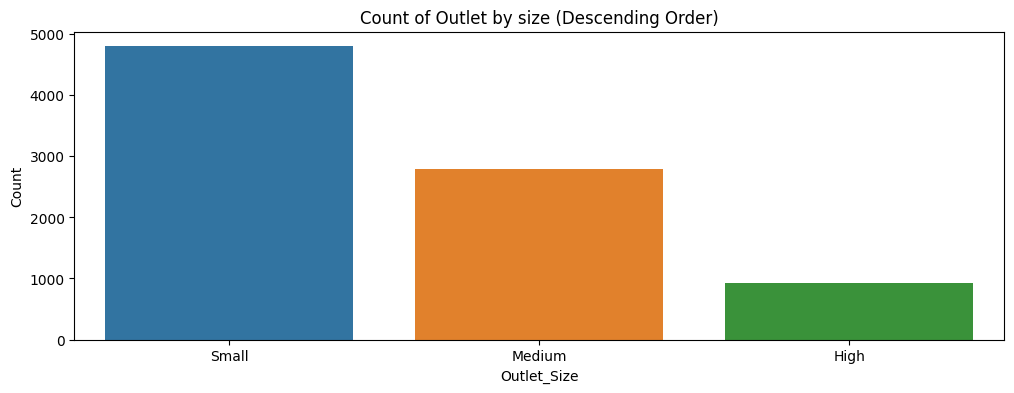

In [25]:
# Calculate the count of each Outlet_Size and sort in descending order
Outlet_Size_counts = df.Outlet_Size.value_counts().sort_values(ascending=False)

# Create a countplot for "Item_Type" in descending order
plt.figure(figsize=(12, 4))
ax = sns.countplot(data=df, x='Outlet_Size', order=Outlet_Size_counts.index)
plt.xlabel('Outlet_Size')
plt.ylabel('Count')
plt.title('Count of Outlet by size (Descending Order)')


Text(0.5, 1.0, 'Count of Outlet by Location Type (Descending Order)')

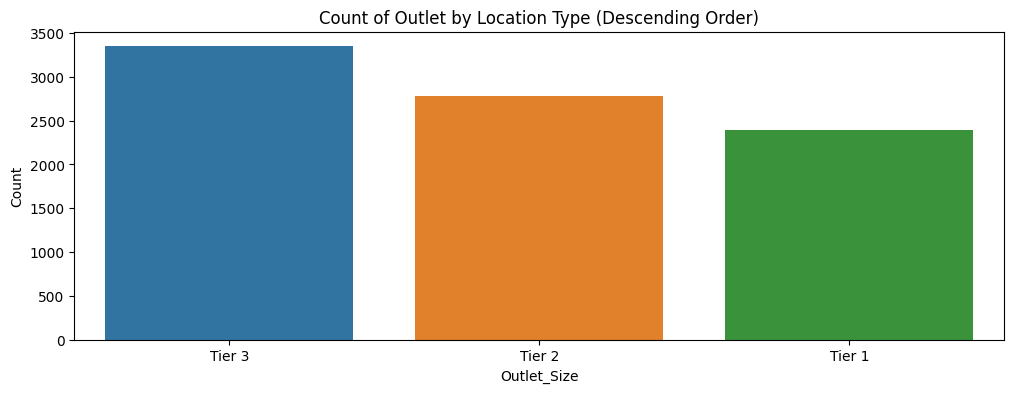

In [26]:
# Calculate the count of each Outlet_Location_Type and sort in descending order
Outlet_Location_Type_counts = df.Outlet_Location_Type.value_counts().sort_values(ascending=False)

# Create a countplot for "Item_Type" in descending order
plt.figure(figsize=(12, 4))
ax = sns.countplot(data=df, x='Outlet_Location_Type', order=Outlet_Location_Type_counts.index)
plt.xlabel('Outlet_Size')
plt.ylabel('Count')
plt.title('Count of Outlet by Location Type (Descending Order)')

Text(0.5, 1.0, 'Count of Outlet by Type (Descending Order)')

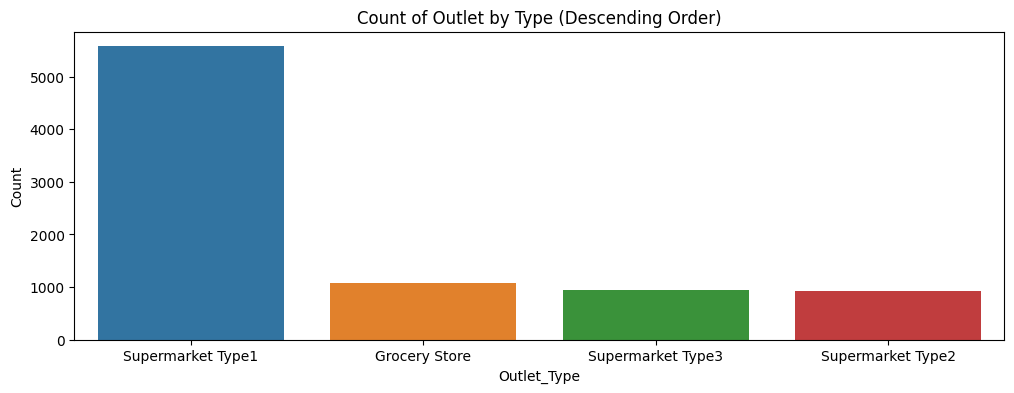

In [27]:
# Calculate the count of each Outlet_Type and sort in descending order
Outlet_Type_counts = df.Outlet_Type.value_counts().sort_values(ascending=False)

# Create a countplot for "Item_Type" in descending order
plt.figure(figsize=(12, 4))
ax = sns.countplot(data=df, x='Outlet_Type', order=Outlet_Type_counts.index)
plt.xlabel('Outlet_Type')
plt.ylabel('Count')
plt.title('Count of Outlet by Type (Descending Order)')


## Data PreProcessing

In [28]:
encoder = LabelEncoder()

In [29]:
categorical_list

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [30]:
# Using LabelEncoder to provide labels for the categorical data
df.Item_Identifier = encoder.fit_transform(df.Item_Identifier)
df.Item_Fat_Content = encoder.fit_transform(df.Item_Fat_Content)
df.Item_Type = encoder.fit_transform(df.Item_Type)
df.Outlet_Identifier = encoder.fit_transform(df.Outlet_Identifier)
df.Outlet_Location_Type = encoder.fit_transform(df.Outlet_Location_Type)
df.Outlet_Size = encoder.fit_transform(df.Outlet_Size)
df.Outlet_Type = encoder.fit_transform(df.Outlet_Type)

In [31]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


### Splitting the data

In [32]:
X = df.drop(columns='Item_Outlet_Sales',axis=1)
# if you are removing a column you need to specify axis = 1
Y = df.Item_Outlet_Sales

X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [33]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

## Test and Train Splitting

In [34]:
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y,random_state=2,test_size=0.33)

In [35]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(5710, 11) (2813, 11) (5710,) (2813,)


## Model Training

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
linear_reg = LinearRegression()

# Fit the model
linear_reg.fit(X_train, Y_train)

# Make predictions
y_pred_linear = linear_reg.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(Y_test, y_pred_linear)
r2_linear = r2_score(Y_test, y_pred_linear)

print("Linear Regression:")
print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)

Linear Regression:
Mean Squared Error: 1494259.0321162841
R-squared: 0.5111756510879003


In [37]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lasso_reg = Lasso()

# Fit the model
lasso_reg.fit(X_train, Y_train)

# Make predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(Y_test, y_pred_lasso)
r2_lasso = r2_score(Y_test, y_pred_lasso)

print("Lasso Regression:")
print("Mean Squared Error:", mse_lasso)
print("R-squared:", r2_lasso)

Lasso Regression:
Mean Squared Error: 1495246.2314944544
R-squared: 0.5108527036718844


### Here, We can observe that the MSE for Linear and Lasso are same. This means that there is no overfitting.

### The predicted values are stored in arrays y_pred_linear and y_pred_lasso
----------------------------------------------------------------------------------------------------------------------------------------------------------



### Project by Suraj R S, RNS Insitute of Technology, Bangalore
### Github: Surajrs812
### Project submitted to ineuron.ai as Internship project
